In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [316]:
apps_data = pd.read_csv('googleplaystore.csv')
apps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [317]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [318]:
apps_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [319]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [320]:
for col in apps_data.columns:
    pct_missing = apps_data[col].isnull().sum()/len(apps_data[col])
    print(f'{col} - {pct_missing}')

App - 0.0
Category - 0.0
Rating - 0.13596531685268887
Reviews - 0.0
Size - 0.0
Installs - 0.0
Type - 9.224241306152569e-05
Price - 0.0
Content Rating - 9.224241306152569e-05
Genres - 0.0
Last Updated - 0.0
Current Ver - 0.0007379393044922055
Android Ver - 0.0002767272391845771


In [321]:
apps_data.Rating.fillna(apps_data.groupby('Category').Rating.transform('median'), inplace=True)

print(apps_data.groupby('Category').Rating.median())

Category
1.9                    19.0
ART_AND_DESIGN          4.4
AUTO_AND_VEHICLES       4.3
BEAUTY                  4.3
BOOKS_AND_REFERENCE     4.5
BUSINESS                4.3
COMICS                  4.4
COMMUNICATION           4.3
DATING                  4.1
EDUCATION               4.4
ENTERTAINMENT           4.2
EVENTS                  4.5
FAMILY                  4.3
FINANCE                 4.3
FOOD_AND_DRINK          4.3
GAME                    4.4
HEALTH_AND_FITNESS      4.5
HOUSE_AND_HOME          4.3
LIBRARIES_AND_DEMO      4.2
LIFESTYLE               4.2
MAPS_AND_NAVIGATION     4.2
MEDICAL                 4.3
NEWS_AND_MAGAZINES      4.2
PARENTING               4.4
PERSONALIZATION         4.4
PHOTOGRAPHY             4.3
PRODUCTIVITY            4.3
SHOPPING                4.3
SOCIAL                  4.3
SPORTS                  4.3
TOOLS                   4.2
TRAVEL_AND_LOCAL        4.3
VIDEO_PLAYERS           4.2
WEATHER                 4.3
Name: Rating, dtype: float64


In [322]:
apps_data.Rating.isnull().sum()

0

In [323]:
apps_data.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10841, dtype: object

In [324]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Installs

In [325]:
apps_data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [326]:
def adjust_installs(x):
    x = x.replace('+','')
    x = x.replace(',','')
    x = x.replace('Free','100')
    return int(x)
    
apps_data['Installs'] = apps_data['Installs'].apply(adjust_installs)

In [327]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


### Reviews

In [328]:
def wrong_values(column):
    incorrect = []
    counter = 0
    for val in apps_data[column]:
        counter +=1
        try:
            int(val)
        except:
            incorrect.append(val)
    return [set(incorrect), counter]

In [329]:
wrong_values('Reviews')

[{'3.0M'}, 10841]

In [330]:
def adjust_reviews(x):
    if type(x) == str:
        x = x.replace('3.0M','3000000')
    return int(x)
# apps_data.loc[1,'Reviews'] = int(apps_data.loc[1,'Reviews']).astype('int64')
apps_data['Reviews'] = apps_data['Reviews'].astype('object')
apps_data['Reviews'] = apps_data['Reviews'].apply(adjust_reviews)
apps_data['Reviews'] = apps_data['Reviews'].astype('int64')

In [331]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.1+ MB


### Size

In [332]:
wrong_values('Size')

[{'1,000+',
  '1.0M',
  '1.1M',
  '1.2M',
  '1.3M',
  '1.4M',
  '1.5M',
  '1.6M',
  '1.7M',
  '1.8M',
  '1.9M',
  '10.0M',
  '100M',
  '1020k',
  '103k',
  '108k',
  '10M',
  '116k',
  '118k',
  '11M',
  '11k',
  '121k',
  '122k',
  '12M',
  '13M',
  '141k',
  '143k',
  '144k',
  '14M',
  '14k',
  '153k',
  '154k',
  '157k',
  '15M',
  '160k',
  '161k',
  '164k',
  '169k',
  '16M',
  '170k',
  '172k',
  '173k',
  '175k',
  '176k',
  '17M',
  '17k',
  '186k',
  '18M',
  '18k',
  '190k',
  '191k',
  '192k',
  '193k',
  '196k',
  '19M',
  '2.0M',
  '2.1M',
  '2.2M',
  '2.3M',
  '2.4M',
  '2.5M',
  '2.6M',
  '2.7M',
  '2.8M',
  '2.9M',
  '200k',
  '201k',
  '203k',
  '206k',
  '208k',
  '209k',
  '20M',
  '20k',
  '210k',
  '219k',
  '21M',
  '220k',
  '221k',
  '222k',
  '226k',
  '228k',
  '22M',
  '232k',
  '234k',
  '237k',
  '238k',
  '239k',
  '23M',
  '23k',
  '240k',
  '241k',
  '243k',
  '245k',
  '246k',
  '24M',
  '24k',
  '251k',
  '253k',
  '257k',
  '259k',
  '25M',
  '25k',


In [333]:
def adjust_reviews(x):
    try:
        if 'M' in x:
            x = x.replace('M','')
            return float(x) * 1000000

        elif 'k' in x:
            x = x.replace('k','')
            return float(x) * 100000

        elif '+' in x:
            x = x.replace('+','')
            x = x.replace(',','')
            return float(x)
        else:
            return int(x)
   
    except:
        return None
        
apps_data['Size'] = apps_data['Size'].apply(adjust_reviews)
apps_data = apps_data.dropna()
apps_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [334]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9135 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9135 non-null   object 
 1   Category        9135 non-null   object 
 2   Rating          9135 non-null   float64
 3   Reviews         9135 non-null   int64  
 4   Size            9135 non-null   float64
 5   Installs        9135 non-null   int64  
 6   Type            9135 non-null   object 
 7   Price           9135 non-null   object 
 8   Content Rating  9135 non-null   object 
 9   Genres          9135 non-null   object 
 10  Last Updated    9135 non-null   object 
 11  Current Ver     9135 non-null   object 
 12  Android Ver     9135 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 999.1+ KB


### Price

In [335]:
wrong_values('Price')


[{'$0.99',
  '$1.00',
  '$1.04',
  '$1.20',
  '$1.26',
  '$1.29',
  '$1.49',
  '$1.50',
  '$1.59',
  '$1.61',
  '$1.70',
  '$1.75',
  '$1.76',
  '$1.96',
  '$1.97',
  '$1.99',
  '$10.00',
  '$10.99',
  '$109.99',
  '$11.99',
  '$12.99',
  '$13.99',
  '$14.00',
  '$14.99',
  '$15.46',
  '$15.99',
  '$154.99',
  '$16.99',
  '$17.99',
  '$18.99',
  '$19.40',
  '$19.90',
  '$19.99',
  '$2.00',
  '$2.49',
  '$2.56',
  '$2.59',
  '$2.60',
  '$2.90',
  '$2.99',
  '$200.00',
  '$24.99',
  '$25.99',
  '$28.99',
  '$29.99',
  '$299.99',
  '$3.02',
  '$3.04',
  '$3.08',
  '$3.28',
  '$3.49',
  '$3.61',
  '$3.88',
  '$3.99',
  '$30.99',
  '$33.99',
  '$37.99',
  '$379.99',
  '$389.99',
  '$39.99',
  '$394.99',
  '$399.99',
  '$4.29',
  '$4.49',
  '$4.60',
  '$4.77',
  '$4.80',
  '$4.84',
  '$4.85',
  '$4.99',
  '$400.00',
  '$46.99',
  '$5.00',
  '$5.49',
  '$5.99',
  '$6.49',
  '$6.99',
  '$7.49',
  '$7.99',
  '$74.99',
  '$79.99',
  '$8.49',
  '$8.99',
  '$89.99',
  '$9.00',
  '$9.99'},
 9135]

In [336]:
def adjust_reviews(x):
    if type(x) == str:
        x = x.replace('$','')
    return int(x)

apps_data['Reviews'] = apps_data['Reviews'].astype('int64')

NameError: name 'apps' is not defined

In [223]:
apps_data  = apps_data.describe()

,Rating,Reviews,Size,Installs
count,9135.000000,9.135000e+03,9.135000e+03,9.135000e+03
mean,4.193574,2.493186e+05,2.306233e+07,7.122458e+06
std,0.503964,1.717130e+06,2.331538e+07,4.621827e+07
min,1.000000,0.000000e+00,8.500000e+05,0.000000e+00
25%,4.100000,2.200000e+01,5.500000e+06,1.000000e+03
50%,4.300000,7.420000e+02,1.400000e+07,1.000000e+05
75%,4.500000,2.516900e+04,3.200000e+07,1.000000e+06
max,5.000000,4.489389e+07,1.020000e+08,1.000000e+09


### Visualization

In [224]:
apps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


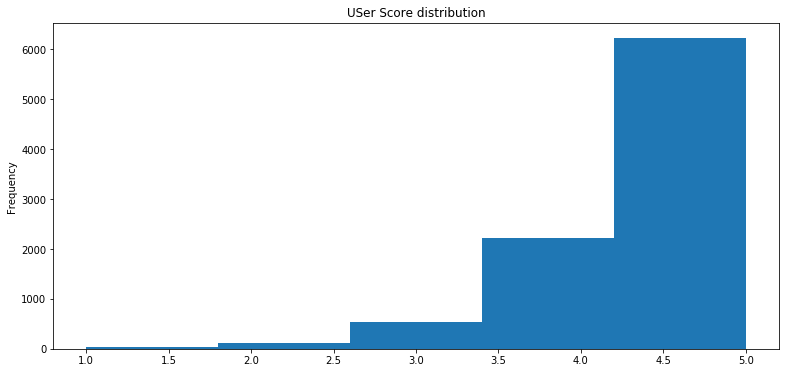

In [229]:
# распределение оценок пользователей
apps_data.Rating.plot(kind='hist', 
                   bins=5,
                   title='USer Score distribution',
                   xlabel='USer score',
                   ylabel='Games',
             )

# Создавая игру у вас самый большой шанс на успех

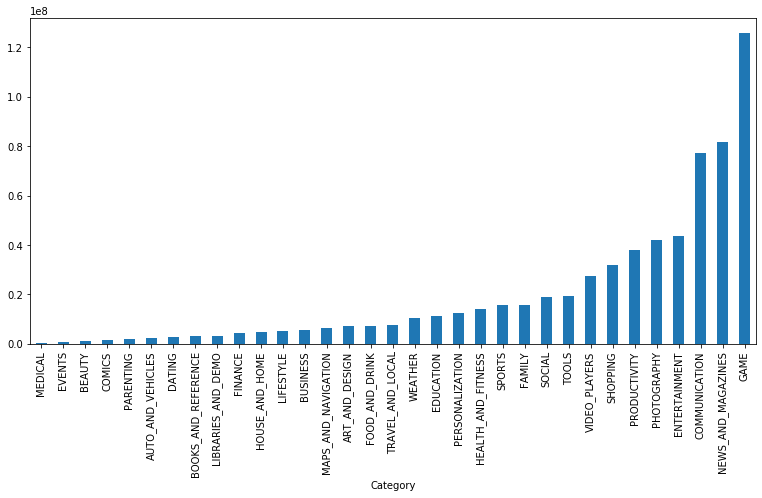

In [308]:
grouped_by_category = apps_data.groupby('Category').mean()
score = grouped_by_category['Installs']*grouped_by_category['Rating']
score.sort_values().plot(kind = 'bar')

# Семейных приложений больше всего

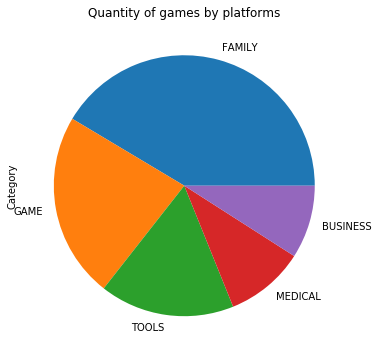

In [241]:
# количество apps по categories
apps_data.Category.value_counts().sort_values(ascending = False).head(5).plot(kind='pie',
                   title='Quantity of games by platforms')

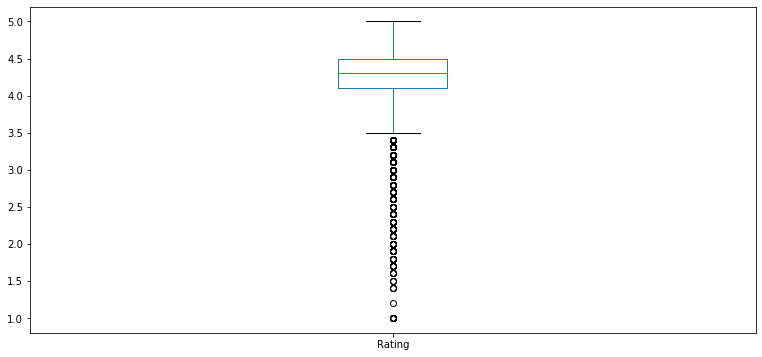

In [244]:
apps_data.Rating.plot(kind='box')

In [245]:
apps_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [252]:
import seaborn as sns

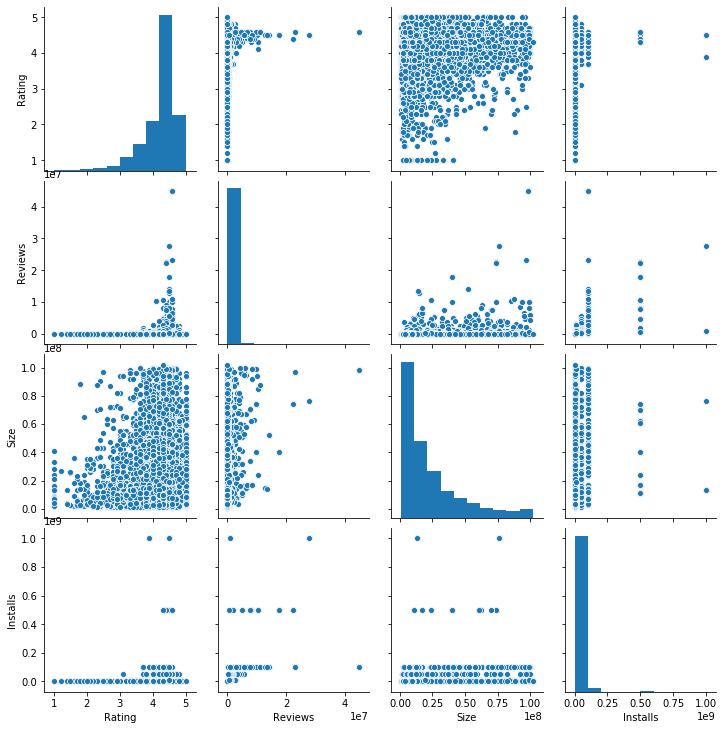

In [254]:
sns.pairplot(apps_data[['Category', 'Rating', 'Reviews','Size', 'Installs']])

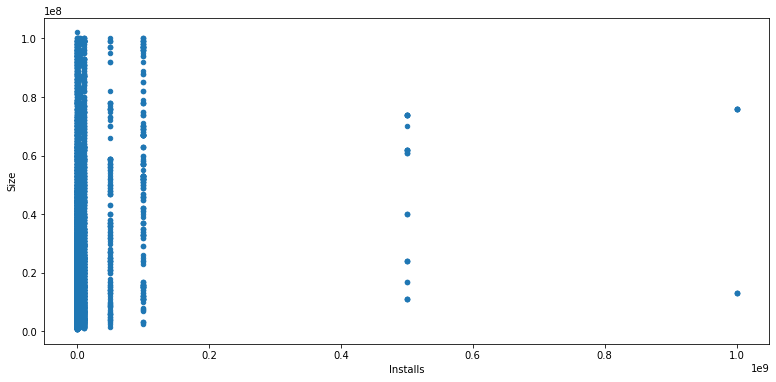

In [258]:
apps_data.plot(kind = 'scatter', y='Size', x = 'Installs')

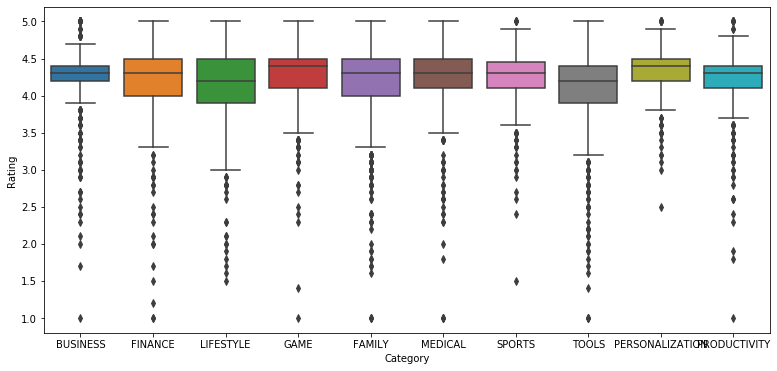

In [260]:
top_categories = apps_data.Category.value_counts().sort_values(ascending = False).head(10).index.values
top_categories
sns.boxplot(x="Category", y="Rating", 
            data=apps_data[apps_data.Category.isin(top_categories)])

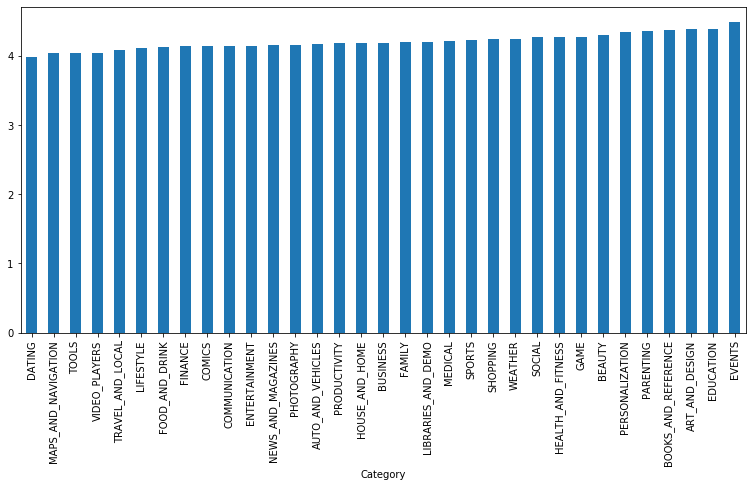

In [262]:
apps_data.groupby('Category')['Rating'].mean().sort_values().plot(kind = 'bar')

# Чем меньше возрастных ограничений, тем больше скачиваний

In [311]:
category_content_sales = apps_data[apps_data.Category.isin(top_categories)].pivot_table(
                        index='Category', 
                        columns='Content Rating', 
                        values='Installs', 
                        aggfunc='sum').fillna(0)

category_content_sales

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Category,,,,,,
BUSINESS,0.0,5.359755e+08,1.000000e+02,5.0,1.029300e+05,0.0
FAMILY,0.0,4.787691e+09,1.224404e+09,48930032.0,7.377073e+08,500.0
FINANCE,0.0,3.158115e+08,0.000000e+00,0.0,1.112000e+06,0.0
GAME,0.0,1.771218e+10,8.683260e+09,348622210.0,3.130503e+09,0.0
LIFESTYLE,0.0,3.168270e+08,1.010100e+07,102015000.0,8.877821e+06,0.0
MEDICAL,0.0,4.624486e+07,1.321100e+05,105800.0,6.111000e+04,0.0
PERSONALIZATION,0.0,7.532314e+08,2.510000e+06,1721010.0,2.407063e+08,0.0
PRODUCTIVITY,0.0,2.742305e+09,5.000000e+03,1000.0,2.115000e+03,0.0
SPORTS,1000000.0,9.458269e+08,5.056100e+07,1000000.0,1.405616e+08,0.0


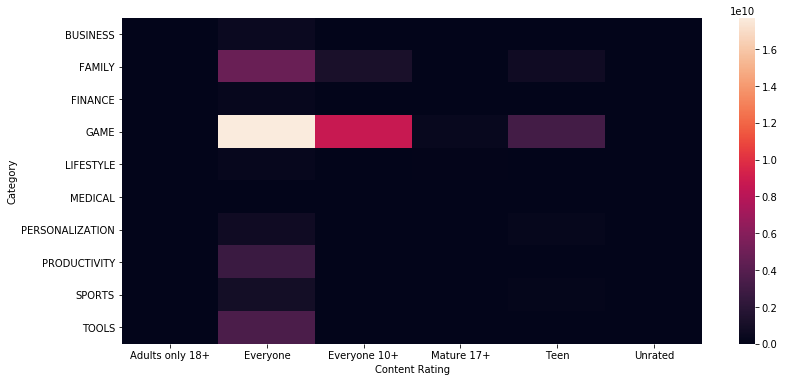

In [312]:
sns.heatmap(category_content_sales)

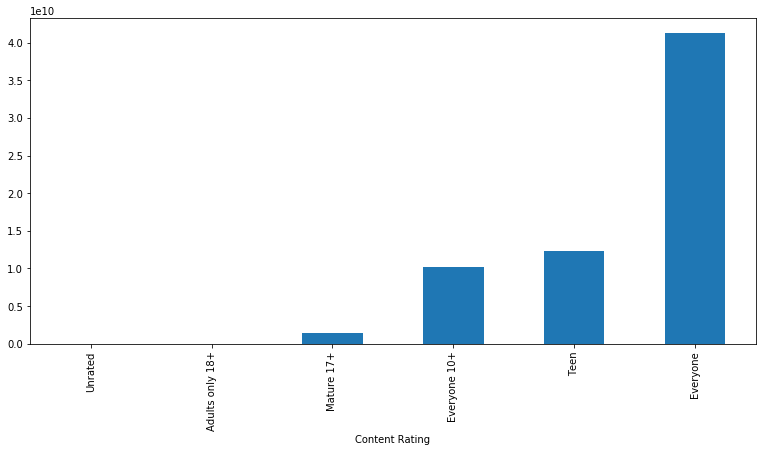

In [285]:
apps_data.groupby('Content Rating').sum().Installs.sort_values().plot(kind = 'bar')

In [294]:
downloadsapps_data.groupby('Category').Installs.sum() / apps_data.groupby('Category').Installs.count()

Category
ART_AND_DESIGN         1.628411e+06
AUTO_AND_VEHICLES      5.836028e+05
BEAUTY                 2.914245e+05
BOOKS_AND_REFERENCE    7.140871e+05
BUSINESS               1.340196e+06
COMICS                 3.448265e+05
COMMUNICATION          1.864884e+07
DATING                 6.692491e+05
EDUCATION              2.511730e+06
ENTERTAINMENT          1.056622e+07
EVENTS                 1.872307e+05
FAMILY                 3.717186e+06
FINANCE                1.032324e+06
FOOD_AND_DRINK         1.776887e+06
GAME                   2.943307e+07
HEALTH_AND_FITNESS     3.289439e+06
HOUSE_AND_HOME         1.104595e+06
LIBRARIES_AND_DEMO     7.518014e+05
LIFESTYLE              1.269046e+06
MAPS_AND_NAVIGATION    1.620647e+06
MEDICAL                1.072440e+05
NEWS_AND_MAGAZINES     1.968521e+07
PARENTING              4.439076e+05
PERSONALIZATION        2.827674e+06
PHOTOGRAPHY            1.007046e+07
PRODUCTIVITY           9.050537e+06
SHOPPING               7.483825e+06
SOCIAL             

## Очень слабая корелляция между оценкой и скачиваниями, что может указывать на:

### 1) Оценка не влияет на скачивания
### 2) Плохое качество данных GIGO

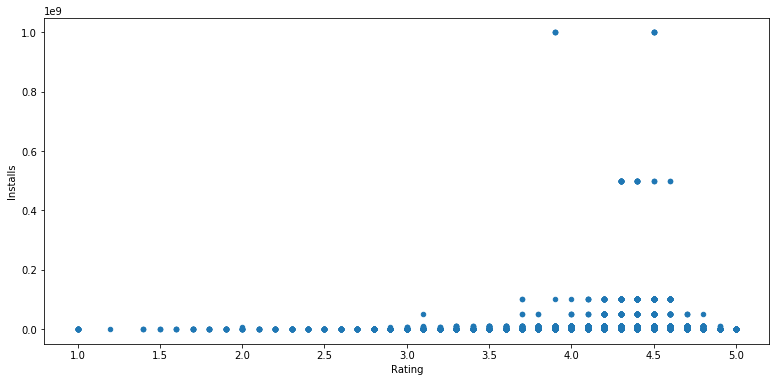

In [314]:
apps_data.plot(kind='scatter', y = 'Installs', x = 'Rating')